# Домашнее задание 2


In [0]:
import numpy as np
import pandas as pd
import matplotlib as pyplot

from scipy import ndimage #спецификатор для работы с изображениями
from scipy import misc 
from PIL import Image

%matplotlib inline

Что такое NumPy?
Зачем используется и почему работает быстрее?

## Задание 1

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array np.array

In [0]:
pic = misc.face() #встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [0]:
print( type(pic), pic.shape)

<class 'numpy.ndarray'> (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:**

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

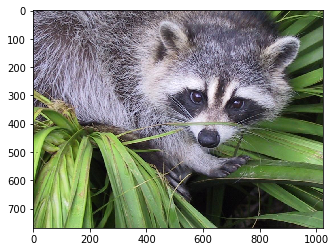

In [0]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [0]:
print(pic[1:10])

[[[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 [[ 81  77  94]
  [ 97  93 110]
  [113 109 126]
  ...
  [116 127  71]
  [121 132  76]
  [125 136  80]]

 ...

 [[ 68  68  80]
  [ 70  69  83]
  [ 67  66  80]
  ...
  [117 141  81]
  [120 146  85]
  [123 149  88]]

 [[102 102 114]
  [ 94  94 106]
  [ 85  84  98]
  ...
  [109 137  78]
  [ 98 126  67]
  [ 91 119  60]]

 [[123 123 135]
  [116 116 128]
  [108 108 120]
  ...
  [ 55  84  26]
  [ 47  76  18]
  [ 44  73  15]]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. В каких пределах лежат значения глубины цветов?

In [0]:
print(np.max(pic),
np.min(pic))

255 0


## Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [0]:
pic = misc.face(gray=True)

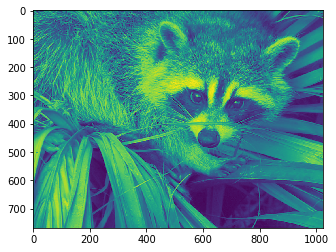

In [0]:
plt.imshow(pic)

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать?

In [0]:
print(np.shape(pic))
h,w=np.shape(pic)

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

In [0]:
for i in range(len(pic)):
    pic[i]=pic[i][::-1]

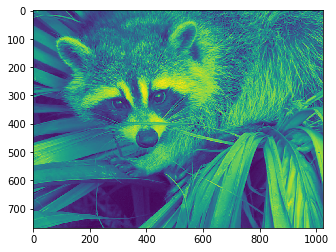

In [0]:
plt.imshow(pic)

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [0]:
for i in range(len(pic)):
    pic[i]=[x+50 for x in pic[i]]

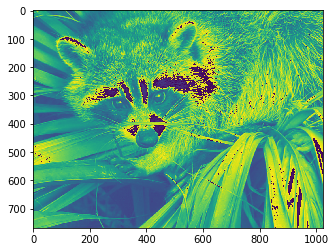

In [0]:
plt.imshow(pic)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [0]:
color_pic = np.zeros((h,w,3))
for i in range(h):
    for j in range(w):
        color_pic[i][j][0]=int(pic[i][j]/200)
        color_pic[i][j][1]=int(pic[i][j]/200)
        color_pic[i][j][2]=int(pic[i][j]/200)

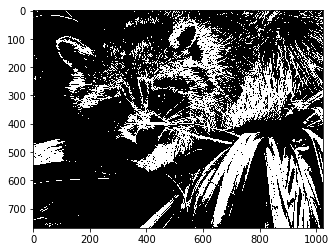

In [0]:
plt.imshow(color_pic)

## Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [0]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

/home/nestyme/anaconda3/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/nestyme/anaconda3/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


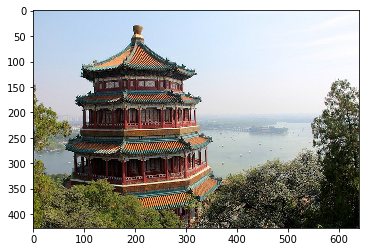

In [0]:
china = load_sample_image('china.jpg')
plt.imshow(china)

In [0]:
h, w, c = np.shape(china)

Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

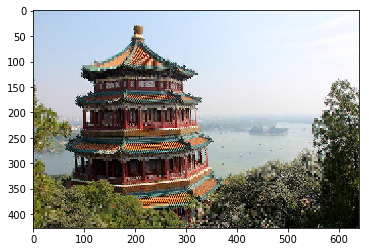

In [0]:
from copy import copy
compressed_pic = copy(china)
for i in range(0,h-3,4):
    for j in range(0,w-3,4):
        for k in range(3):
            for z in range(3):
                compressed_pic[i+z][j+k]=compressed_pic[i][j]
plt.imshow(compressed_pic)       

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой.

In [0]:
def calculate_mismatch(a,b):
    mismatch=0
    for i in range(len(a)):
        for j in range(len(a[i])):
            for k in range(c):
                mismatch += a[i][j][k]-b[i][j][k]
    print(mismatch)

In [0]:
calculate_mismatch(china, compressed_pic)

/home/nestyme/.local/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in ubyte_scalars


42384387


Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [0]:
h,w,c=np.shape(china)
transform_picture=np.zeros((h,w,3))

In [0]:
mean = np.mean(china)

In [0]:
for i in range(h):
    for j in range(w):
        for c in range(3):
            transform_picture[i][j][c] = np.sin(china[i][j][c])

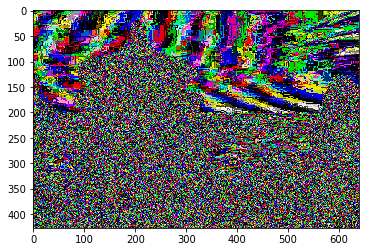

In [0]:
plt.imshow(transform_picture) 

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*
это задание является дополнительным

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [0]:
import librosa #импортируем библиотеку
import IPython.display

In [0]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [0]:
IPython.display.Audio(audio, rate=sr)

In [0]:
sr

22050

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [0]:
print(type(audio),'\n',audio.shape[0]/sr,'sec\n', audio.mean(),'kHz')

<class 'numpy.ndarray'> 
 11.415510204081633 sec
 2.8395081e-05 kHz


    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

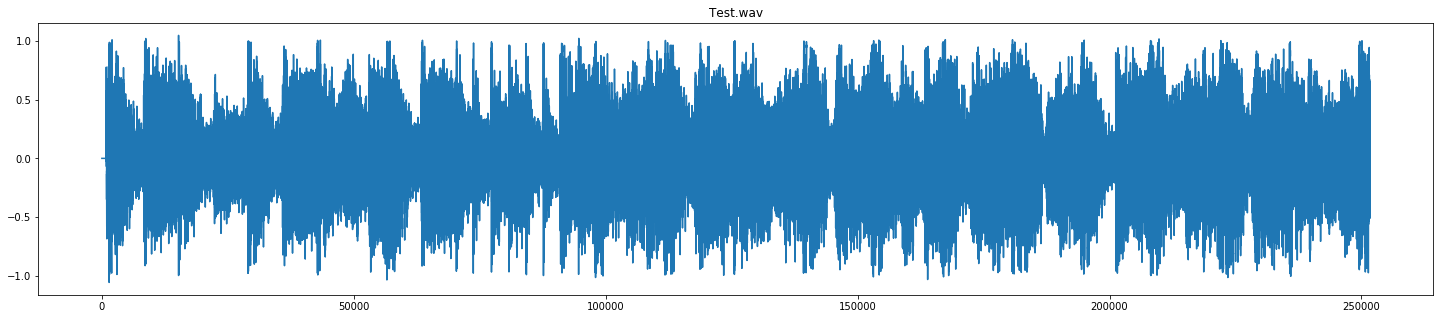

In [0]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

Обрежьте последние 4 секунды файла

In [0]:
audio = audio[len(audio)-4*sr]

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [0]:
audio = [x*0.75 for x in audio]

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [0]:
IPython.display.Audio(audio, rate=sr)